In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading files
excel_file = '/content/BU26 priorities db.xlsx'
df = pd.read_excel(excel_file, header=1) # deleting first line to adjust headers
display(df.head())

,Étiquettes de lignes,Mandatory W,Mandatory S,Tactical,(vide)
0,Product & Business,302240.840411,7499.455389,58180.475491,NaN
1,End-of-year celebration,66745.834206,NaN,NaN,NaN
2,HJ events - International,51510.351438,NaN,NaN,NaN
3,Love,44055.666924,NaN,NaN,NaN
4,Santos,26216.626286,NaN,NaN,NaN


## **Global Check**

In [3]:
#Defining variables
total_mandatory = df['Mandatory W'].sum() + df['Mandatory S'].sum() # Mandatory priorities sum (W + S)
total_tactical = df['Tactical'].sum()
total_other = df['(vide)'].sum()

#Total of all priorities
total_priorities = total_mandatory + total_tactical + total_other

# Current threshold of Mandatory priorities (W + S)
percentage_mandatory = (total_mandatory / total_priorities) * 100

print(f"Mandatory Priorities Current Global Threshold: {percentage_mandatory:.2f}%")

Mandatory Priorities Current Global Threshold: 50.36%


In [4]:
# Tactical priorities
percentage_tactical = (total_tactical / total_priorities) * 100

# Other non-mandatory priorities
percentage_other= (total_other / total_priorities) * 100

print(f"Tactical: {percentage_tactical:.2f}%")
print(f"Other non-mandatory: {percentage_other:.2f}%")

Tactical: 7.39%
Other non-mandatory: 42.25%


## **Regions Check**

In [5]:
import pandas as pd

# Loading data
file_path = "/content/BU26 priorities db.xlsx"
df = pd.read_excel(file_path, sheet_name='results-20250728-115027')

# Numeric variables check
df['budget_euro'] = pd.to_numeric(df['budget_euro'], errors='coerce')
df.head() # viz


,geo_level_1,geo_level_2,geo_level_3,geo_level_4,geo_level_5,geo_level_5_code,pc_level_0,pc_level_1,pc_level_2,pc_level_3,...,touchpoint_level_3_code,local_currency,budget_local_currency,exchange_rate_name,exchange_rate,budget_euro,cycle,cycle_code,MAPPING 1,MAPPING 2
0,Markets,Europe,Benelux & Nordics,Nordics,Sweden,SV5,Commercial,Celebrations,End-of-year celebration,End Of Year Celebrations,...,SMA,EUR,322.0,Avg Apr 25,1.0,322.0,LE06-26,FY26 _ LE1,Mandatory W,Product & Business
1,Markets,Europe,Benelux & Nordics,Nordics,Sweden,SV5,Commercial,Celebrations,End-of-year celebration,End Of Year Celebrations,...,POFM_PRI,EUR,260.0,Avg Apr 25,1.0,260.0,LE06-26,FY26 _ LE1,Mandatory W,Product & Business
2,Markets,Europe,Benelux & Nordics,Nordics,Sweden,SV5,Commercial,Celebrations,End-of-year celebration,End Of Year Celebrations,...,POFM_OOH,EUR,206.0,Avg Apr 25,1.0,206.0,LE06-26,FY26 _ LE1,Mandatory W,Product & Business
3,Markets,Europe,Benelux & Nordics,Nordics,Sweden,SV5,Other Transversal,Other - Transversal,Other - Transversal,Other transversal,...,ADC,EUR,60.0,Avg Apr 25,1.0,60.0,LE06-26,FY26 _ LE1,NaN,NaN
4,Markets,Europe,Benelux & Nordics,Nordics,Sweden,SV5,Institutional,Institutional,Institutional - Other,Institutional - Other,...,M&C,EUR,15.0,Avg Apr 25,1.0,15.0,LE06-26,FY26 _ LE1,NaN,NaN


In [6]:

df = df.dropna(subset=['geo_level_2', 'budget_euro'])

# Filter for desired regions
desired_regions = ['Japan', 'China', 'Europe','MEAI','South America','South Korea', 'North Asia','South East Asia & Oceania (SEAO)','North America']
df = df[df['geo_level_2'].isin(desired_regions)]

# Budget per region display
total_budget = df.groupby('geo_level_2')['budget_euro'].sum().rename('total_region_budget')

# Mandatory priorities (W + S) per region
mandatory_df = df[df['MAPPING 1'].isin(['Mandatory W', 'Mandatory S'])]
mandatory_budget = mandatory_df.groupby('geo_level_2')['budget_euro'].sum().rename('mandatory_budget')

# Region summary
region_summary = pd.concat([mandatory_budget, total_budget], axis=1)

# Mandatory percentage per region
region_summary['mandatory_percentage'] = (region_summary['mandatory_budget'] / region_summary['total_region_budget']) * 100

# Rounding
region_summary = region_summary.fillna(0).round(2).sort_values(by='mandatory_percentage', ascending=False)
print(region_summary)

                                  mandatory_budget  total_region_budget  \
geo_level_2                                                               
South Korea                               13484.43             22925.65   
MEAI                                      32223.74             55393.43   
Europe                                    47311.37             84900.12   
Japan                                     21876.26             42872.16   
South East Asia & Oceania (SEAO)          17429.51             34197.24   
China                                     43816.89             92124.53   
North America                             62268.87            136002.49   
North Asia                                14290.65             31827.06   
South America                              5837.02             13562.17   

                                  mandatory_percentage  
geo_level_2                                             
South Korea                                      58.82  
MEA

## **All Regions Comparison**

In [7]:
all_regions_df = df.copy()

# Replacing NaM column for'MAPPING 1'
all_regions_df['MAPPING 1'] = all_regions_df['MAPPING 1'].fillna('Other Non-mandatory')

# Grouping and suming budget
regional_budget_all = all_regions_df.groupby(['geo_level_2', 'MAPPING 1'])['budget_euro'].sum().unstack().fillna(0)

# Total budget per region
regional_budget_all['Total Regional Budget'] = regional_budget_all.sum(axis=1)


In [8]:
priority_types = ['Mandatory S', 'Mandatory W', 'Tactical', 'Other Non-mandatory']

for p_type in priority_types:
    if p_type in regional_budget_all.columns:
        regional_budget_all[f'{p_type} (%)'] = (regional_budget_all[p_type] / regional_budget_all['Total Regional Budget']) * 100
    else:
        regional_budget_all[f'{p_type} (%)'] = 0

# Mandatory priorities sum (W+S)
regional_budget_all['Mandatory (%)'] = regional_budget_all['Mandatory S (%)'] + regional_budget_all['Mandatory W (%)']

# %
percentage_columns_all = ['Mandatory (%)', 'Tactical (%)', 'Other Non-mandatory (%)']
regional_budget_percentages_all = regional_budget_all[percentage_columns_all].round(2)


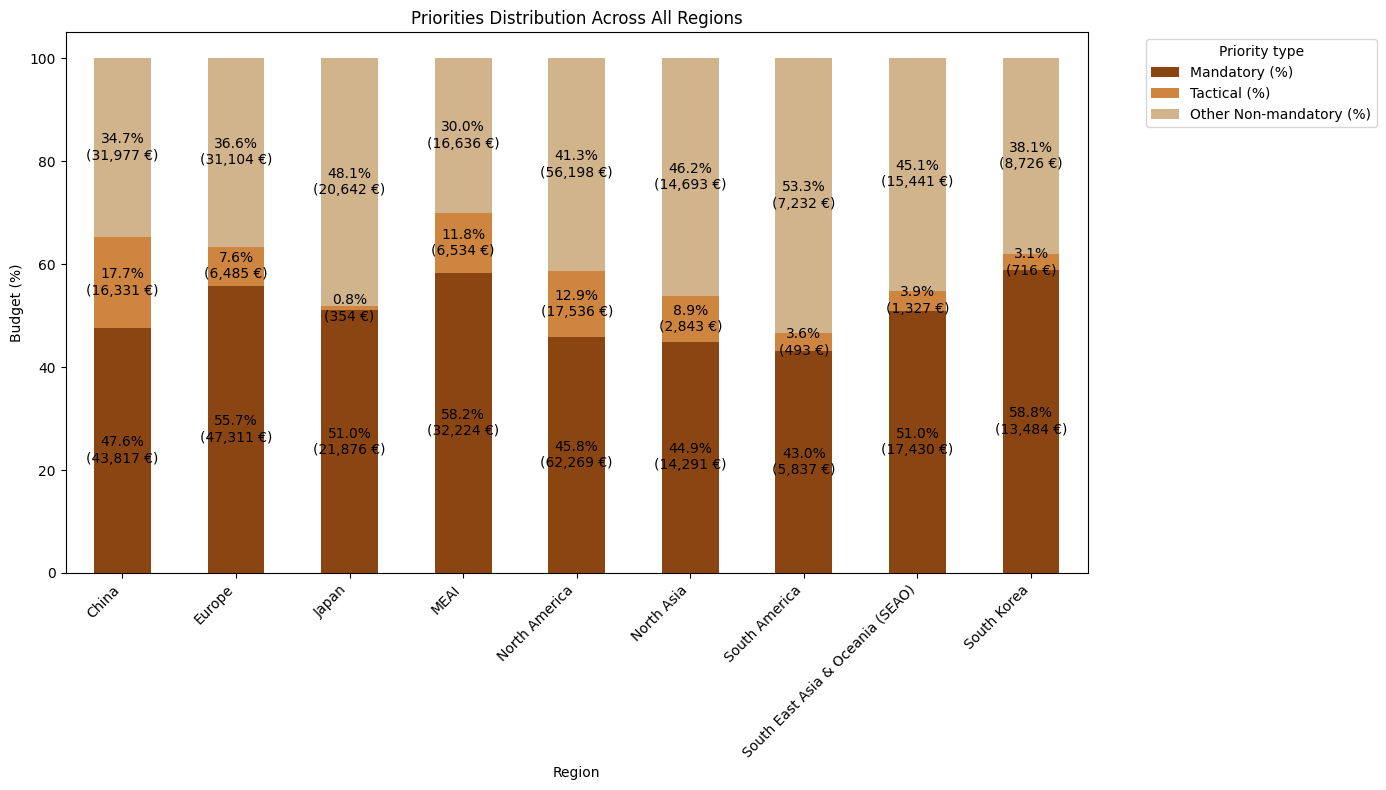

In [9]:
# Stacked Bar Chart for All Regions

colors = ['#8B4513', '#CD853F', '#D2B48C']

ax = regional_budget_percentages_all.plot(
    kind='bar', stacked=True, figsize=(14, 8),
    color=colors
)

plt.title('Priorities Distribution Across All Regions')
plt.xlabel('Region')
plt.ylabel('Budget (%)')
plt.xticks(rotation=45, ha='right')

ax.legend(title='Priority type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Getting the budget values

budget_for_labels = pd.DataFrame(index=regional_budget_all.index)
budget_for_labels['Mandatory'] = regional_budget_all['Mandatory S'] + regional_budget_all['Mandatory W']
budget_for_labels['Tactical'] = regional_budget_all['Tactical']
budget_for_labels['Other Non-mandatory'] = regional_budget_all['Other Non-mandatory']


# Generate labels with both percentage and budget in Euros
for i, c in enumerate(ax.containers):
    labels = []
    for j, v in enumerate(c):
        percentage = v.get_height()
        # Get the corresponding budget value for this segment (row j, column i)
        budget_euro = budget_for_labels.iloc[j, i] if not budget_for_labels.empty else 0 # Handle potential empty case

        if percentage > 0:
            # Format budget_euro for better readability (e.g., with commas)
            labels.append(f'{percentage:0.1f}%\n({budget_euro:,.0f} €)') # Added comma formatting and Euro symbol
        else:
            labels.append('')

    ax.bar_label(c, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

# Low-Compliance Regions

### **Counts**

In [10]:
#Regions to investigate
low_mandatory_regions = ['China', 'North America', 'North Asia', 'South America']

# Filtering DataFrame
low_mandatory_df = df[df['geo_level_2'].isin(low_mandatory_regions)]

# Grouping regions by priorities (Mapping 1 value)
regional_low_priority_breakdown = (
    low_mandatory_df
    .groupby('geo_level_2')['MAPPING 1']
    .value_counts(dropna=False)
    .unstack()
    .fillna(0)
)

# Renaming vide column
for col in regional_low_priority_breakdown.columns:
    if pd.isna(col) or str(col).strip().lower() in ['nan', '', '(vide)']:
        regional_low_priority_breakdown = regional_low_priority_breakdown.rename(columns={col: 'Other Non-mandatory'})

# Mostrar resultado limpio
print("Distribución de prioridades por tipo:")
print(regional_low_priority_breakdown)


Distribución de prioridades por tipo:
MAPPING 1      Mandatory S  Mandatory W  Tactical  Other Non-mandatory
geo_level_2                                                           
China                    9           95        51                   68
North America           14          105       121                   86
North Asia               6          126        47                   85
South America            1           98        10                   55


### **Percentages**

In [11]:
# Filtering and keeping regions
low_mandatory_df_budget = df[df['geo_level_2'].isin(low_mandatory_regions)].copy()

#  MAPPING 1
if 'geo_level_2' not in low_mandatory_df_budget.columns or 'MAPPING 1' not in low_mandatory_df_budget.columns or 'budget_euro' not in low_mandatory_df_budget.columns:
    print("Error: Columns 'geo_level_2', 'MAPPING 1' o 'budget_euro' not found in dataframe.")
else:
    # Renaming NaN in 'MAPPING 1' for grouping
    low_mandatory_df_budget['MAPPING 1'] = low_mandatory_df_budget['MAPPING 1'].fillna('Other Non-mandatory')

    # Summing regions'  budget
    regional_priority_budget = low_mandatory_df_budget.groupby(['geo_level_2', 'MAPPING 1'])['budget_euro'].sum().unstack().fillna(0)

    # Totql budget for each region
    regional_priority_budget['Total Regional Budget'] = regional_priority_budget.sum(axis=1)

    # Calculating % for each priority type
    priority_types = ['Mandatory S', 'Mandatory W', 'Tactical', 'Other Non-mandatory'] # Ensuring required columns exist after unstacking
    for priority_type in priority_types:
        if priority_type in regional_priority_budget.columns:
            regional_priority_budget[f'{priority_type} (%)'] = (regional_priority_budget[priority_type] / regional_priority_budget['Total Regional Budget']) * 100
        else:
            regional_priority_budget[f'{priority_type} (%)'] = 0 # Add column with 0 if not present

    # Mandatory priorities sum:  Mandatory S + Mandatory W percentages
    regional_priority_budget['Mandatory (%)'] = regional_priority_budget['Mandatory S (%)'] + regional_priority_budget['Mandatory W (%)']

    # Table formatting
    percentage_columns_to_display = ['Mandatory (%)', 'Tactical (%)', 'Other Non-mandatory (%)']
    regional_low_priority_budget_percentages = regional_priority_budget[percentage_columns_to_display].round(2)


    print(regional_low_priority_budget_percentages)

MAPPING 1      Mandatory (%)  Tactical (%)  Other Non-mandatory (%)
geo_level_2                                                        
China                  47.56         17.73                    34.71
North America          45.79         12.89                    41.32
North Asia             44.90          8.93                    46.17
South America          43.04          3.63                    53.33


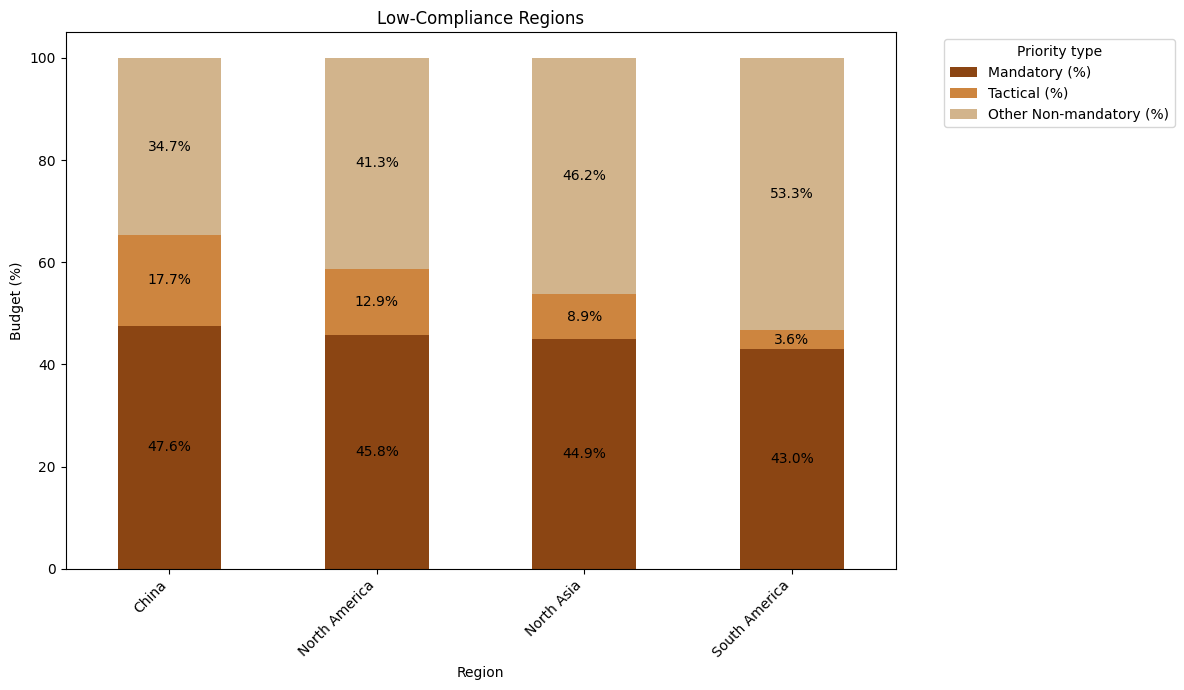

In [12]:
# Low-mandatory regions

colors = ['#8B4513', '#CD853F', '#D2B48C']
ax = regional_low_priority_budget_percentages.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

# Adding title and labels
plt.title('Low-Compliance Regions')
plt.xlabel('Region')
plt.ylabel('Budget (%)')
plt.xticks(rotation=45, ha='right')


ax.legend(title='Priority type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Legends
for c in ax.containers:
    labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')



# Plot
plt.tight_layout()
plt.show()

# Low-Compliance Factors

## **Touchpoints check**

touchpoint_level_1   CRM  Content & Production  Experience  Media  \
geo_level_2                                                         
China               0.75                  2.79       28.46  53.86   
North America       1.18                  0.79       25.64  57.86   
North Asia          1.78                  0.13       46.06  25.14   
South America       2.11                  1.03       25.06  44.52   

touchpoint_level_1  Operational costs  Opex in A&P  PR & Ambassadorship  
geo_level_2                                                              
China                            6.71         0.00                 7.42  
North America                    9.39         0.90                 4.25  
North Asia                      19.28         3.83                 3.78  
South America                   20.36         0.00                 6.92  


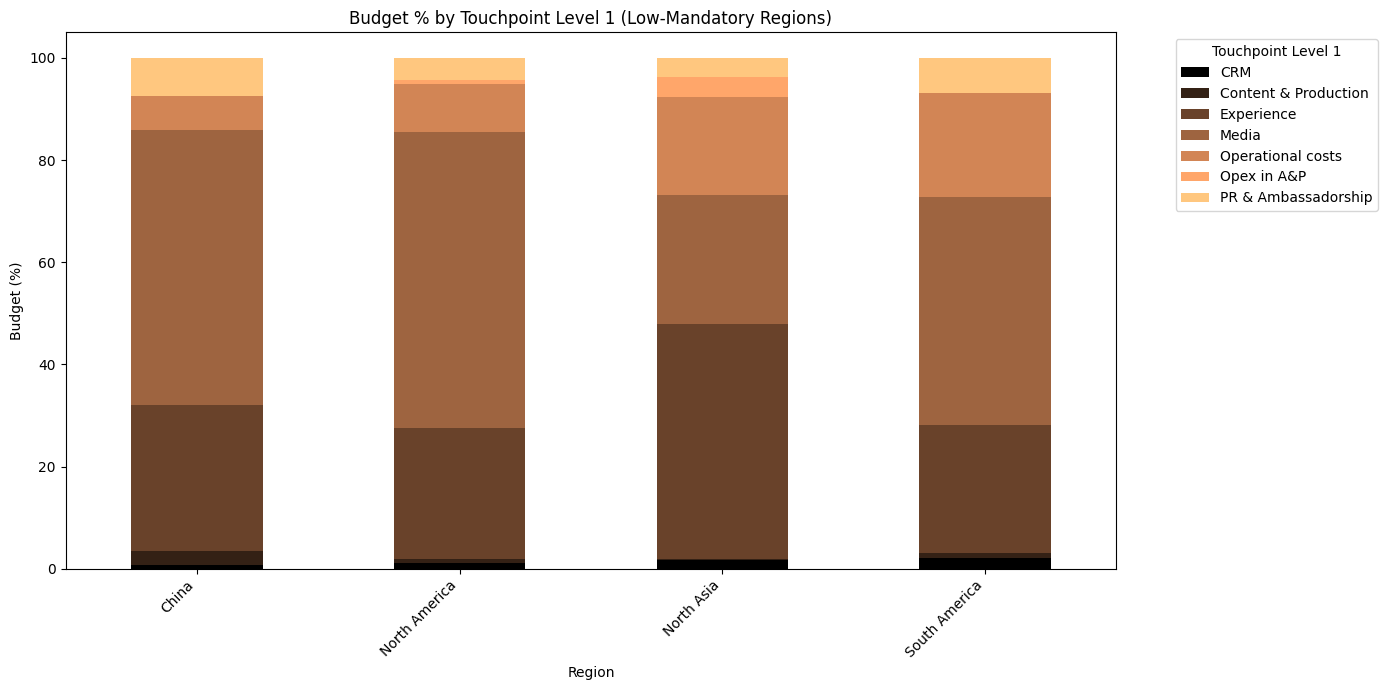

In [13]:

# Copying df to avoid changes
low_regions = ['China', 'North America', 'North Asia', 'South America']
low_df = df[df['geo_level_2'].isin(low_regions)].copy()

# Pivotting into touchpoint level 1
low_df['touchpoint_level_1'] = low_df['touchpoint_level_1'].fillna('Other')

# Budget per region
region_total_budget = low_df.groupby('geo_level_2')['budget_euro'].sum()

# Budget per TP
tp1_budget = low_df.groupby(['geo_level_2', 'touchpoint_level_1'])['budget_euro'].sum().unstack(fill_value=0)

#  Weight (%) of touchpoints per region
tp1_percentage = tp1_budget.div(region_total_budget, axis=0) * 100
tp1_percentage = tp1_percentage.round(2)

print(tp1_percentage)

#Plot
tp1_percentage.plot(kind='bar', stacked=True, figsize=(14,7), colormap='copper')
plt.title('Budget % by Touchpoint Level 1 (Low-Mandatory Regions)')
plt.ylabel('Budget (%)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Touchpoint Level 1', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


## **Non-Mandatory TP levels check**

Non-Mandatory Touchpoint Level 1 (% of region budget):


touchpoint_level_1,CRM,Content & Production,Experience,Media,Operational costs,PR & Ambassadorship
geo_level_2,,,,,,
China,0.00,1.38,3.56,12.75,0.00,0.03
North America,0.00,0.21,4.88,6.56,0.32,0.93
North Asia,0.38,0.00,5.86,2.50,0.00,0.20
South America,0.00,0.34,2.77,0.00,0.53,0.00


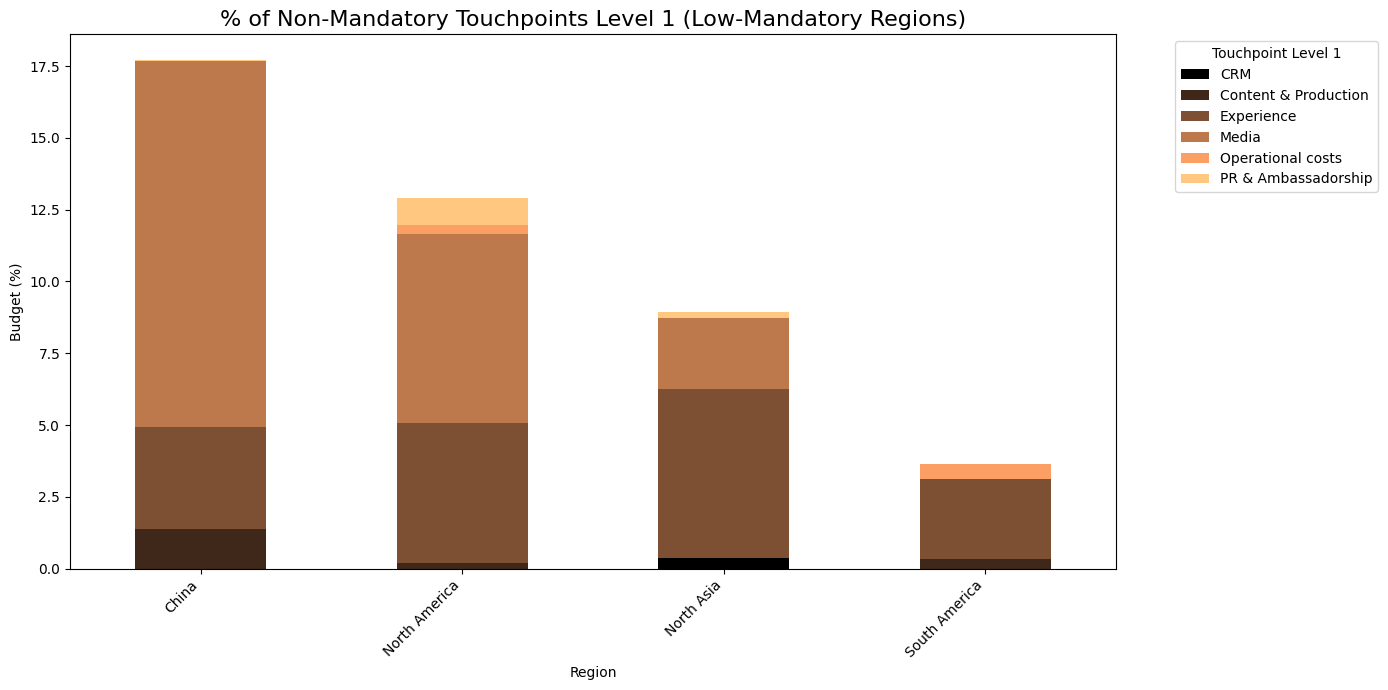

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Filtering low-mandatory regions and non-mandatory priorities ---
low_mandatory_regions = ['China', 'North America', 'North Asia', 'South America']
low_df = df[df['geo_level_2'].isin(low_mandatory_regions)].copy()

# Non-mandatory priorities (Tactical + Other Non-mandatory)
low_non_mandatory_df = low_df[low_df['MAPPING 1'].isin(['Tactical', 'Other Non-mandatory'])].copy()

# Fill missing TP names
low_non_mandatory_df[['touchpoint_level_1', 'touchpoint_level_2']] = low_non_mandatory_df[['touchpoint_level_1', 'touchpoint_level_2']].fillna('Other')

# --- Total regional budget ---
region_total_budget = low_df.groupby('geo_level_2')['budget_euro'].sum()

# --- Level 1 analysis ---
tp1_budget = (
    low_non_mandatory_df
    .groupby(['geo_level_2', 'touchpoint_level_1'])['budget_euro']
    .sum()
    .unstack(fill_value=0)
)

tp1_percentage = tp1_budget.div(region_total_budget, axis=0) * 100
tp1_percentage = tp1_percentage.round(2)

print("Non-Mandatory Touchpoint Level 1 (% of region budget):")
display(tp1_percentage)

#  Level 1 stacked bar chart
tp1_percentage.plot(kind='bar', stacked=True, figsize=(14,7), colormap='copper')
plt.title('% of Non-Mandatory Touchpoints Level 1 (Low-Mandatory Regions)', fontsize=16)
plt.ylabel('Budget (%)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Touchpoint Level 1', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()



## **TP Tactical check**

In [15]:
# --- TP Level 2  ---
tp2_budget = (
    low_non_mandatory_df
    .groupby(['geo_level_2', 'touchpoint_level_1', 'touchpoint_level_2'])['budget_euro']
    .sum()
    .reset_index()
)

# Percentage within TP Level 1
tp1_total_per_region_tp1 = tp2_budget.groupby(['geo_level_2', 'touchpoint_level_1'])['budget_euro'].transform('sum')
tp2_budget['pct_of_tp1'] = (tp2_budget['budget_euro'] / tp1_total_per_region_tp1 * 100).round(2)

# Percentage of total regional budget
tp2_budget['pct_of_region'] = tp2_budget.apply(lambda x: x['budget_euro'] / region_total_budget[x['geo_level_2']] * 100, axis=1).round(2)

# Total tactical budget per region
region_tactical_total = low_non_mandatory_df[low_non_mandatory_df['MAPPING 1'] == 'Tactical'].groupby('geo_level_2')['budget_euro'].sum()

# Percentage of total tactical budget
tp2_budget['pct_of_tactical'] = tp2_budget.apply(
    lambda x: (x['budget_euro'] / region_tactical_total[x['geo_level_2']] * 100).round(2)
    if x['geo_level_2'] in region_tactical_total and region_tactical_total[x['geo_level_2']] > 0 else 0,
    axis=1
)


# --- Top 3 TP Level 2  per region ---
top_tp2_by_region = (
    tp2_budget.groupby('geo_level_2', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'budget_euro'))
    .reset_index(drop=True)
)

print("Top 3 Non-Mandatory Touchpoint Level 2 by region:")
display(top_tp2_by_region[['geo_level_2', 'touchpoint_level_1', 'touchpoint_level_2', 'budget_euro', 'pct_of_tp1', 'pct_of_region', 'pct_of_tactical']])

Top 3 Non-Mandatory Touchpoint Level 2 by region:


/tmp/ipython-input-2340358398.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


,geo_level_2,touchpoint_level_1,touchpoint_level_2,budget_euro,pct_of_tp1,pct_of_region,pct_of_tactical
0,China,Media,Paid Online media,9786.281979,83.30,10.62,59.93
1,China,Media,Paid Offline media,1900.214493,16.18,2.06,11.64
2,China,Content & Production,Digital & Social campaigns,1247.760881,98.08,1.35,7.64
3,North America,Media,Paid Online media,8730.351213,97.88,6.42,49.79
4,North America,Experience,Visual Merchandising (excl. pop-ups/pop-ins),2258.624527,34.06,1.66,12.88
5,North America,Experience,"Fragrance testers, gifts with purchases and sa...",1602.492767,24.17,1.18,9.14
6,North Asia,Media,Paid Online media,730.237659,91.94,2.29,25.69
7,North Asia,Experience,Pop-ups,493.772633,26.46,1.55,17.37
8,North Asia,Experience,Visual Merchandising (excl. pop-ups/pop-ins),461.575899,24.74,1.45,16.24
9,South America,Experience,"Fragrance testers, gifts with purchases and sa...",227.019809,60.43,1.67,46.08


## **TP Other non mandatory check**

In [16]:
 #--- Filter for Other Non-mandatory priorities ---

low_mandatory_regions = ['China', 'North America', 'North Asia', 'South America'] # Ensure this list is defined

# Filter the main DataFrame for low-mandatory regions to create low_compliance_df
low_compliance_df = df[df['geo_level_2'].isin(low_mandatory_regions)].copy()

# Fill missing values in 'MAPPING 1' with 'Other Non-mandatory' BEFORE filtering
low_compliance_df['MAPPING 1'] = low_compliance_df['MAPPING 1'].fillna('Other Non-mandatory')

# Display unique values in 'MAPPING 1' after filling NaNs
print("Unique values in 'MAPPING 1' after filling NaNs:")
display(low_compliance_df['MAPPING 1'].unique())


other_non_mandatory_df = low_compliance_df[low_compliance_df['MAPPING 1'] == 'Other Non-mandatory'].copy()


# Fill missing TP names
other_non_mandatory_df[['touchpoint_level_1', 'touchpoint_level_2']] = other_non_mandatory_df[['touchpoint_level_1', 'touchpoint_level_2']].fillna('Other')

# --- TP Level 2 Analysis for Other Non-mandatory ---
tp2_budget_other = (
    other_non_mandatory_df
    .groupby(['geo_level_2', 'touchpoint_level_1', 'touchpoint_level_2'])['budget_euro']
    .sum()
    .reset_index()
)

# Percentage within TP Level 1
tp1_total_per_region_tp1_other = tp2_budget_other.groupby(['geo_level_2', 'touchpoint_level_1'])['budget_euro'].transform('sum')
tp2_budget_other['pct_of_tp1'] = (tp2_budget_other['budget_euro'] / tp1_total_per_region_tp1_other * 100).round(2)

# Percentage of total regional budget
# Calculate region_total_budget within this cell for standalone execution
region_total_budget = df[df['geo_level_2'].isin(low_mandatory_regions)].groupby('geo_level_2')['budget_euro'].sum().rename('region_total_budget')

# Merge to get total regional budget for percentage calculation
tp2_budget_other = tp2_budget_other.merge(region_total_budget, left_on='geo_level_2', right_index=True, how='left')

tp2_budget_other['pct_of_region'] = (tp2_budget_other['budget_euro'] / tp2_budget_other['region_total_budget'] * 100).round(2)


# Total 'Other Non-mandatory' budget per region
region_other_non_total = other_non_mandatory_df.groupby('geo_level_2')['budget_euro'].sum().rename('region_other_non_total')

# Merge to get total other non-mandatory budget for percentage calculation
tp2_budget_other = tp2_budget_other.merge(region_other_non_total, left_on='geo_level_2', right_index=True, how='left')


# Percentage of total 'Other Non-mandatory' budget
tp2_budget_other['pct_of_other_non'] = (tp2_budget_other['budget_euro'] / tp2_budget_other['region_other_non_total'] * 100).round(2)

# Drop the merged total columns
tp2_budget_other = tp2_budget_other.drop(columns=['region_total_budget', 'region_other_non_total'])


# --- Top 3 TP Level 2 per region for Other Non-mandatory ---
top_tp2_by_region_other = (
    tp2_budget_other.groupby('geo_level_2', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'budget_euro'))
    .reset_index(drop=True)
)

print("\nTop 3 'Other Non-mandatory' Touchpoint Level 2 by region:")
display(top_tp2_by_region_other[['geo_level_2', 'touchpoint_level_1', 'touchpoint_level_2', 'budget_euro', 'pct_of_tp1', 'pct_of_region', 'pct_of_other_non']])

Unique values in 'MAPPING 1' after filling NaNs:


array(['Mandatory W', 'Tactical', 'Other Non-mandatory', 'Mandatory S'],
      dtype=object)

/tmp/ipython-input-206045857.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))



Top 3 'Other Non-mandatory' Touchpoint Level 2 by region:


,geo_level_2,touchpoint_level_1,touchpoint_level_2,budget_euro,pct_of_tp1,pct_of_region,pct_of_other_non
0,China,Media,Paid Online media,10337.851754,79.83,11.22,32.33
1,China,Operational costs,Depreciation,5904.163942,96.09,6.41,18.46
2,China,PR & Ambassadorship,Ambassadors,4276.739612,85.13,4.64,13.37
3,North America,Media,Paid Online media,18682.014690,62.17,13.74,33.24
4,North America,Media,Other media,8386.378811,27.91,6.17,14.92
5,North America,Operational costs,Reserve (Operational costs),6842.476742,55.50,5.03,12.18
6,North Asia,Operational costs,Depreciation,4899.668173,79.86,15.39,33.35
7,North Asia,Experience,Visual Merchandising (excl. pop-ups/pop-ins),1831.620472,50.46,5.75,12.47
8,North Asia,Media,Paid Online media,1728.126784,60.13,5.43,11.76
9,South America,Operational costs,Depreciation,2666.206784,99.09,19.66,36.86


/tmp/ipython-input-2109675188.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


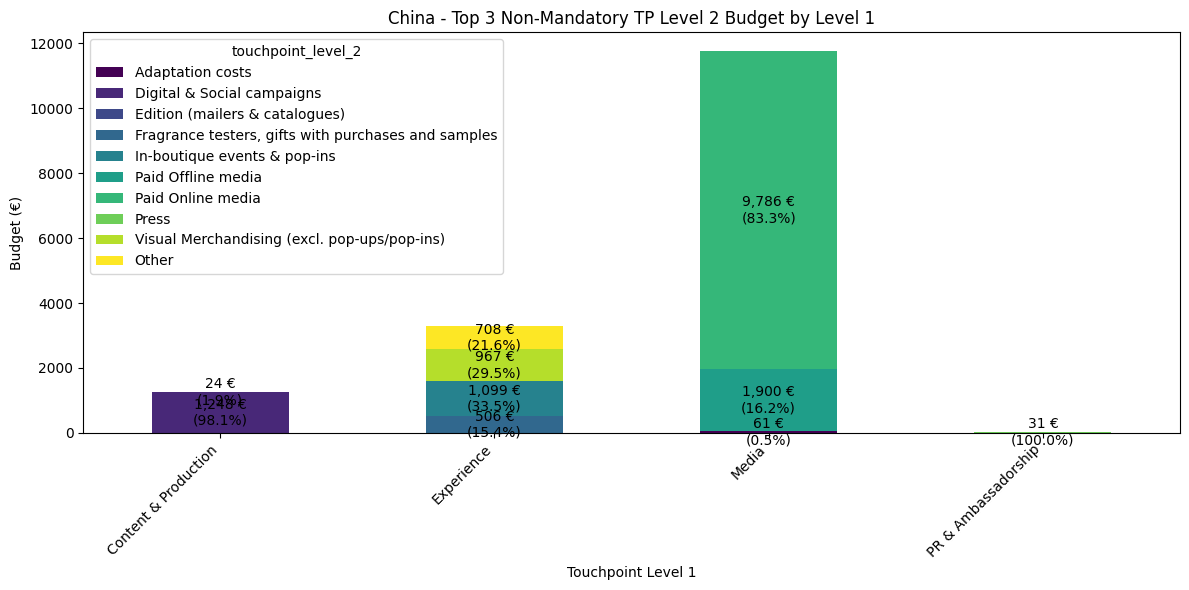

/tmp/ipython-input-2109675188.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


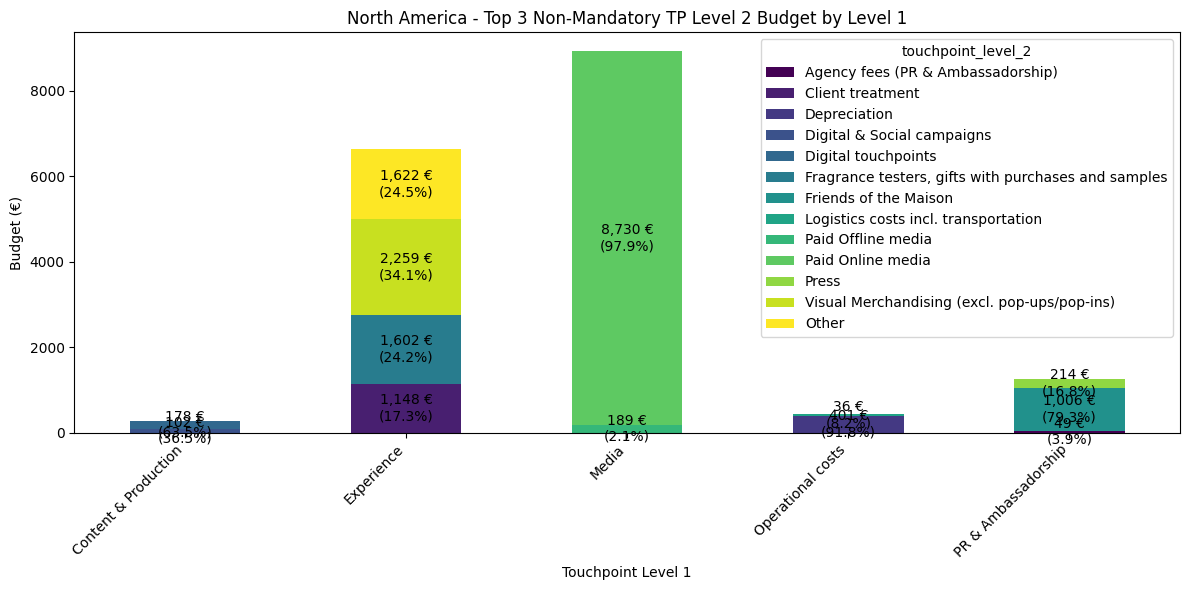

/tmp/ipython-input-2109675188.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


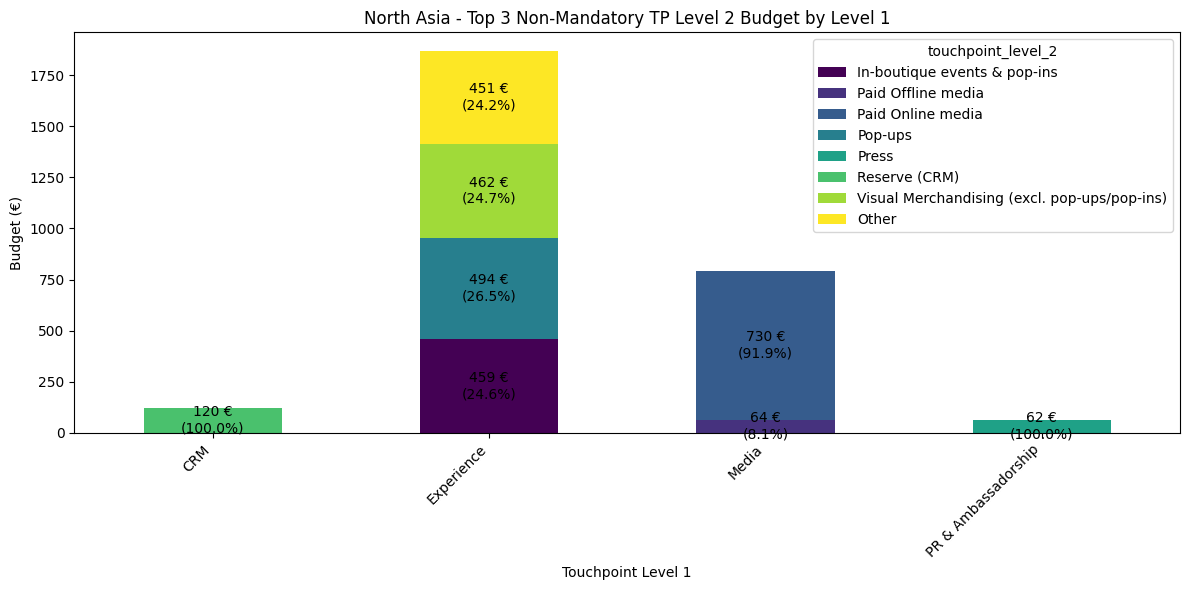

/tmp/ipython-input-2109675188.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


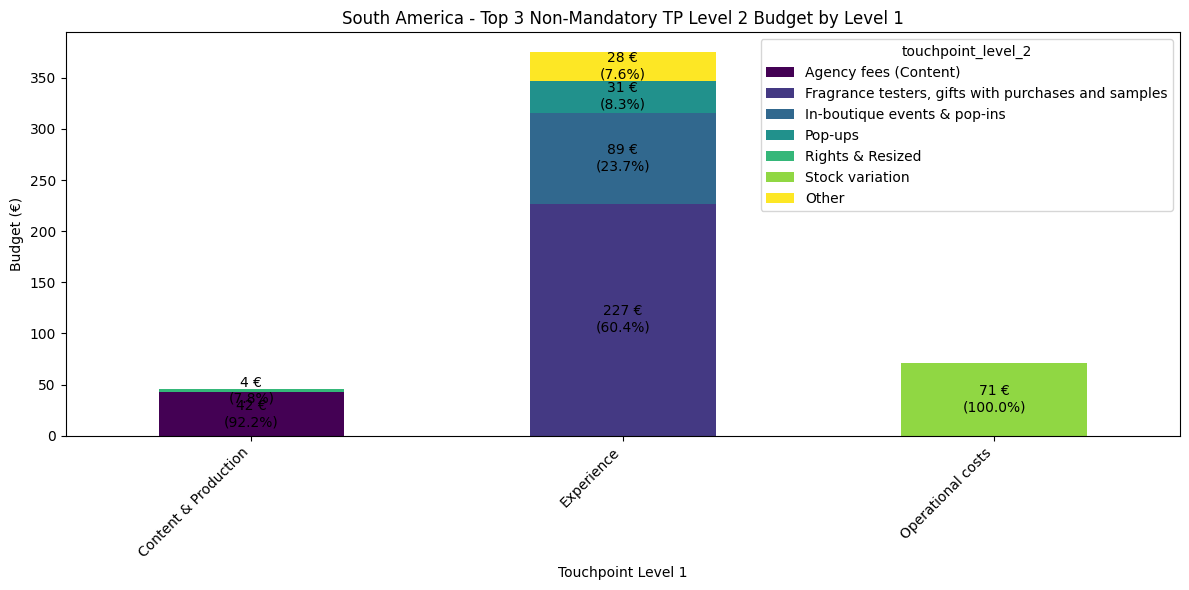

In [19]:
for region in low_non_mandatory_df['geo_level_2'].unique():
    region_df = tp2_budget[tp2_budget['geo_level_2'] == region]

    top_tp2 = (
        region_df.groupby('touchpoint_level_1', group_keys=False)
        .apply(lambda x: x.nlargest(3, 'budget_euro'))
        .reset_index(drop=True)
    )

    pivot_df = top_tp2.pivot(index='touchpoint_level_1', columns='touchpoint_level_2', values='budget_euro').fillna(0)

    # Add "Other" for remaining budget
    remaining_budget = region_df.groupby('touchpoint_level_1')['budget_euro'].sum() - pivot_df.sum(axis=1)
    pivot_df['Other'] = remaining_budget

    # Percentage of Level 1 total
    pivot_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis',
                       title=f"{region} - Top 3 Non-Mandatory TP Level 2 Budget by Level 1")

    plt.ylabel('Budget (€)')
    plt.xlabel('Touchpoint Level 1')
    plt.xticks(rotation=45, ha='right')

    # Add labels with both € and %
    for i, container in enumerate(ax.containers):
        labels = [f'{v:,.0f} €\n({pivot_percentage.iloc[j, i]:.1f}%)' if v > 0 else '' for j, v in enumerate(container.datavalues)]
        ax.bar_label(container, labels=labels, label_type='center')

    plt.tight_layout()
    plt.show()


##**Product Category Check**

### **'MAPPING 1' with 'Tactical'**

In [20]:
# --- Regions to investigate ---
low_mandatory_regions = ['China', 'North America', 'North Asia', 'South America']

# --- Filtering only low-mandatory regions ---
low_compliance_df = df[df['geo_level_2'].isin(low_mandatory_regions)].copy()

# --- Filling missing product category names ---
low_compliance_df[['pc_level_1', 'pc_level_2']] = (
    low_compliance_df[['pc_level_1', 'pc_level_2']].fillna({'pc_level_1': 'Other PC1', 'pc_level_2': 'Other PC2'})
)

# --- Total budgets ---
region_total_budget = low_compliance_df.groupby('geo_level_2')['budget_euro'].sum()
pc1_total_budget_by_region = (
    low_compliance_df.groupby(['geo_level_2', 'pc_level_1'])['budget_euro'].sum().to_dict()
)

# --- Tactical subset ---
tactical_df = low_compliance_df[low_compliance_df['MAPPING 1'] == 'Tactical']
region_tactical_total = tactical_df.groupby('geo_level_2')['budget_euro'].sum()

# --- Group and aggregate Tactical budget ---
pc_budget = (
    tactical_df
    .groupby(['geo_level_2', 'pc_level_1', 'pc_level_2'], as_index=False)['budget_euro']
    .sum()
)

# --- Adding totals ---
pc_budget['region_total'] = pc_budget['geo_level_2'].map(region_total_budget)
pc_budget['tactical_total'] = pc_budget['geo_level_2'].map(region_tactical_total)
pc_budget['pc1_total'] = pc_budget.apply(
    lambda x: pc1_total_budget_by_region.get((x['geo_level_2'], x['pc_level_1']), 0), axis=1
)

# --- Percentages ---
for col_name, numerator, denominator in [
    ('pct_region_total', 'budget_euro', 'region_total'),
    ('pct_pc1_total', 'budget_euro', 'pc1_total'),
    ('pct_tactical_total', 'budget_euro', 'tactical_total')
]:
    pc_budget[col_name] = (
        (pc_budget[numerator] / pc_budget[denominator] * 100)
        .where(pc_budget[denominator] > 0)
        .round(2)
    )

# --- Top 3 Tactical per region ---
top3_pc2 = (
    pc_budget.groupby('geo_level_2', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'budget_euro'))
    .reset_index(drop=True)
)

# --- Display ---
print("Top 3 Tactical PC Level 2 categories by region (low-mandatory):")
display(top3_pc2[['geo_level_2', 'pc_level_1', 'pc_level_2', 'budget_euro',
                  'pct_region_total', 'pct_pc1_total', 'pct_tactical_total']])

Top 3 Tactical PC Level 2 categories by region (low-mandatory):


/tmp/ipython-input-3703394269.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


,geo_level_2,pc_level_1,pc_level_2,budget_euro,pct_region_total,pct_pc1_total,pct_tactical_total
0,China,Celebrations,Other Celebrations,4815.312686,5.23,26.71,29.49
1,China,Celebrations,Chinese New year,4562.889820,4.95,25.31,27.94
2,China,Watches,Ballon Bleu,2763.201433,3.00,16.30,16.92
3,North America,Always-on Transversal Campaign,Always-on Transversal Campaign,5909.092366,4.34,100.00,33.70
4,North America,Celebrations,Other Celebrations,2454.217672,1.80,11.86,14.00
5,North America,Fragrance,Fragrance - Panthère,1904.295571,1.40,41.70,10.86
6,North Asia,Celebrations,Chinese New year,1346.671079,4.23,30.19,47.37
7,North Asia,Always-on Transversal Campaign,Always-on Transversal Campaign,438.179274,1.38,100.00,15.41
8,North Asia,Fragrance,Fragrance - Transversal,350.523213,1.10,92.11,12.33
9,South America,Fragrance,Fragrance - Transversal,492.706389,3.63,100.00,100.00


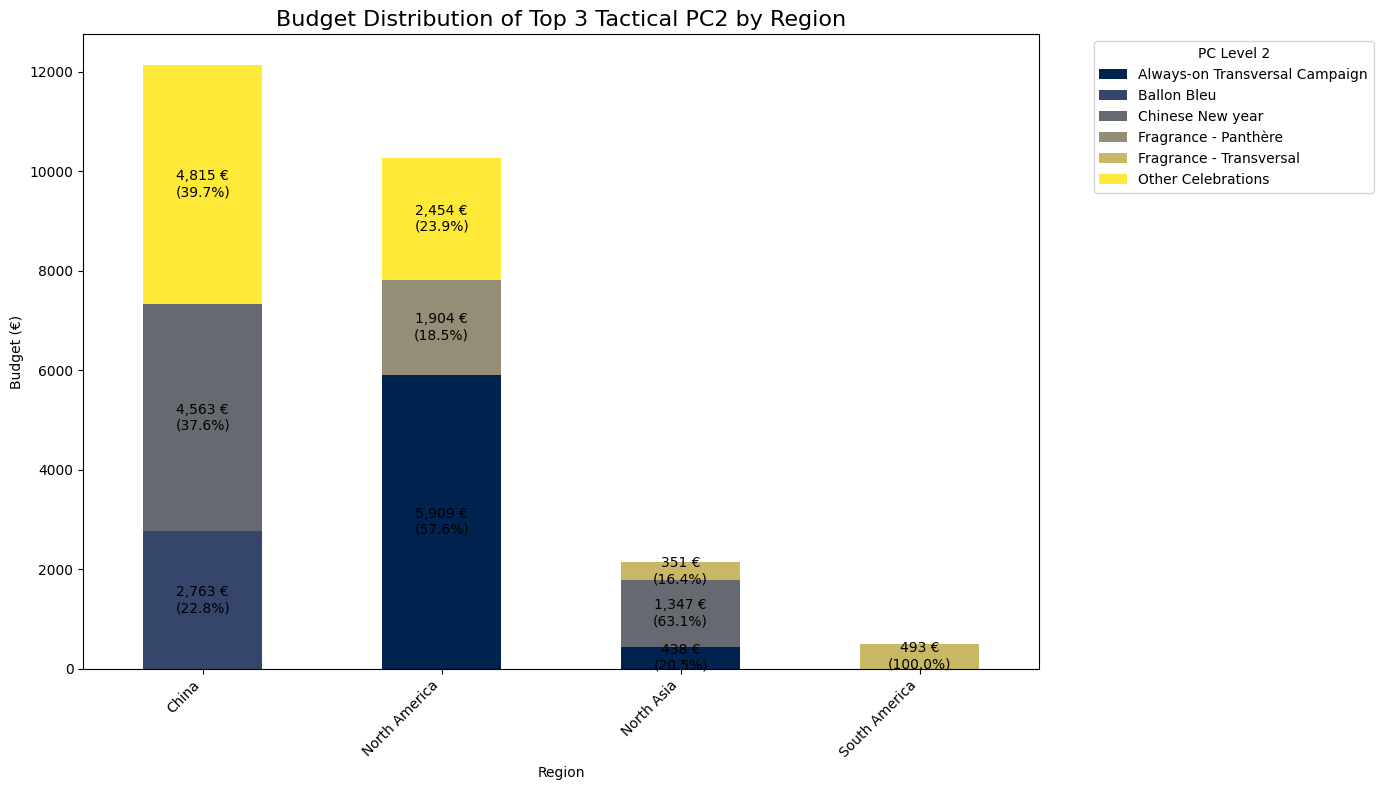

In [21]:
# --- Plot stacked bar chart ---
pivot_plot_data = top3_pc2.pivot(index='geo_level_2', columns='pc_level_2', values='budget_euro').fillna(0)
pivot_plot_percentage = pivot_plot_data.div(pivot_plot_data.sum(axis=1), axis=0) * 100

ax = pivot_plot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='cividis')
plt.title('Budget Distribution of Top 3 Tactical PC2 by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Budget (€)')
plt.xticks(rotation=45, ha='right')
ax.legend(title='PC Level 2', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels: amount + % of total tactical budget
for i, container in enumerate(ax.containers):
    labels = []
    for j, rect in enumerate(container):
        height = rect.get_height()
        if height > 0:
            percentage = pivot_plot_percentage.iloc[j, i]
            labels.append(f'{height:,.0f} €\n({percentage:.1f}%)')
        else:
            labels.append('')
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()


### **'MAPPING 1' with 'Other Non-mandatory'**

In [22]:
# Same process as above
low_mandatory_regions = ['China', 'North America', 'North Asia', 'South America']


low_compliance_df = df[df['geo_level_2'].isin(low_mandatory_regions)].copy()


if 'MAPPING 1' not in low_compliance_df.columns:
    raise KeyError("The column 'MAPPING 1' does not exist in the DataFrame.")
low_compliance_df['MAPPING 1'] = low_compliance_df['MAPPING 1'].fillna('Other Non-mandatory')


region_total_budget = low_compliance_df.groupby('geo_level_2')['budget_euro'].sum()
pc1_total_budget_by_region = (
    low_compliance_df
    .fillna({'pc_level_1': 'Other PC1'})
    .groupby(['geo_level_2', 'pc_level_1'])['budget_euro']
    .sum()
    .to_dict()
)

# --- Filtering now only Other Non-mandatory ---
other_non_df = low_compliance_df[low_compliance_df['MAPPING 1'] == 'Other Non-mandatory'].copy()
other_non_df[['pc_level_1', 'pc_level_2']] = other_non_df[['pc_level_1', 'pc_level_2']].fillna('Other')

# --- Totals per region for Other Non-mandatory ---
region_other_non_total = other_non_df.groupby('geo_level_2')['budget_euro'].sum()


pc_budget_other = (
    other_non_df
    .groupby(['geo_level_2', 'pc_level_1', 'pc_level_2'], as_index=False)['budget_euro']
    .sum()
)


pc_budget_other['region_total'] = pc_budget_other['geo_level_2'].map(region_total_budget)
pc_budget_other['other_non_total'] = pc_budget_other['geo_level_2'].map(region_other_non_total)
pc_budget_other['pc1_total'] = pc_budget_other.apply(
    lambda x: pc1_total_budget_by_region.get((x['geo_level_2'], x['pc_level_1']), 0),
    axis=1
)


pc_budget_other['pct_region_total'] = (pc_budget_other['budget_euro'] / pc_budget_other['region_total'] * 100).round(2)
pc_budget_other['pct_pc1_total'] = (pc_budget_other['budget_euro'] / pc_budget_other['pc1_total'] * 100).round(2)
pc_budget_other['pct_other_non_total'] = (pc_budget_other['budget_euro'] / pc_budget_other['other_non_total'] * 100).round(2)


top3_pc2_other = (
    pc_budget_other.groupby('geo_level_2', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'budget_euro'))
    .reset_index(drop=True)
)

print("Top 3 'Other Non-mandatory' PC Level 2 categories by region (low-mandatory):")
display(
    top3_pc2_other[['geo_level_2', 'pc_level_1', 'pc_level_2', 'budget_euro',
                     'pct_region_total', 'pct_pc1_total', 'pct_other_non_total']]
)


Top 3 'Other Non-mandatory' PC Level 2 categories by region (low-mandatory):


/tmp/ipython-input-3120102364.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, 'budget_euro'))


,geo_level_2,pc_level_1,pc_level_2,budget_euro,pct_region_total,pct_pc1_total,pct_other_non_total
0,China,Watches,Watches - Transversal,8252.451172,8.96,48.69,25.81
1,China,Other - Transversal,Other - Transversal,7338.172639,7.97,100.00,22.95
2,China,Jewelry,Jewelry - Transversal,4920.370470,5.34,28.33,15.39
3,North America,Institutional,Institutional - Other,17791.740930,13.08,75.07,31.66
4,North America,Other - Transversal,Other - Transversal,16988.532749,12.49,100.00,30.23
5,North America,Watches,Watches - Transversal,5752.949032,4.23,36.07,10.24
6,North Asia,Other - Transversal,Other - Transversal,7424.875691,23.33,100.00,50.53
7,North Asia,Institutional,Institutional - Other,2846.770503,8.94,87.28,19.37
8,North Asia,Watches,Watches - Transversal,2360.293563,7.42,58.10,16.06
9,South America,Other - Transversal,Other - Transversal,3699.817306,27.28,100.00,51.16


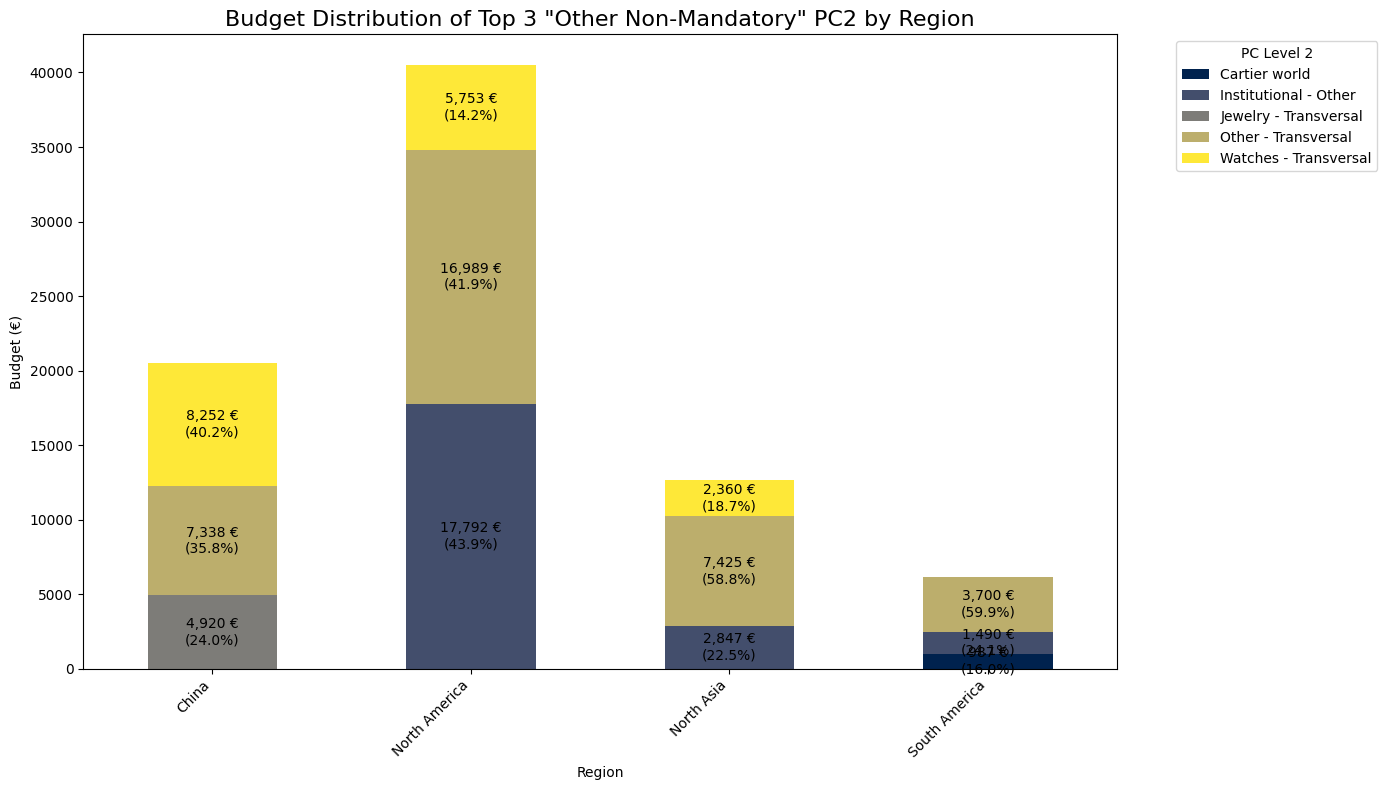

In [23]:
# --- Prepare data for plotting ---
plot_data_other = top3_pc2_other.copy()

# Pivot the data for stacked bar chart (rows: region, columns: PC Level 2)
pivot_plot_data_other = plot_data_other.pivot_table(
    index='geo_level_2', columns='pc_level_2', values='budget_euro', fill_value=0
)

# Calculate percentages relative to Other Non-Mandatory total per region
pivot_plot_percentage_other = pivot_plot_data_other.div(pivot_plot_data_other.sum(axis=1), axis=0) * 100

# --- Plot stacked bar chart ---
ax = pivot_plot_data_other.plot(
    kind='bar', stacked=True, figsize=(14, 8), colormap='cividis'
)

plt.title('Budget Distribution of Top 3 "Other Non-Mandatory" PC2 by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Budget (€)')
plt.xticks(rotation=45, ha='right')
ax.legend(title='PC Level 2', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add budget and percentage labels
for i, container in enumerate(ax.containers):
    labels = []
    for j, rect in enumerate(container):
        height = rect.get_height()
        if height > 0:
            percentage = pivot_plot_percentage_other.iloc[j, i]
            labels.append(f'{height:,.0f} €\n({percentage:.1f}%)')
        else:
            labels.append('')
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()
